Epoch 0, Loss: 0.6931471805599436
Epoch 100, Loss: 12.876919238948663
Epoch 200, Loss: 0.3885023620770536
Epoch 300, Loss: 0.034822340934994485
Epoch 400, Loss: 0.03373989473009696
Epoch 500, Loss: 0.032722836728713615
Epoch 600, Loss: 0.03176591008997715
Epoch 700, Loss: 0.030864368883725027
Epoch 800, Loss: 0.030013920777883858
Epoch 900, Loss: 0.029210676957289076
Epoch 1000, Loss: 0.028451108260140426
Epoch 1100, Loss: 0.02773200667608523
Epoch 1200, Loss: 0.02705045148017879
Epoch 1300, Loss: 0.02640377938518247
Epoch 1400, Loss: 0.0257895581850225
Epoch 1500, Loss: 0.02520556343805071
Epoch 1600, Loss: 0.02464975780262092
Epoch 1700, Loss: 0.024120272691493402
Epoch 1800, Loss: 0.023615391957390267
Epoch 1900, Loss: 0.023133537360989213


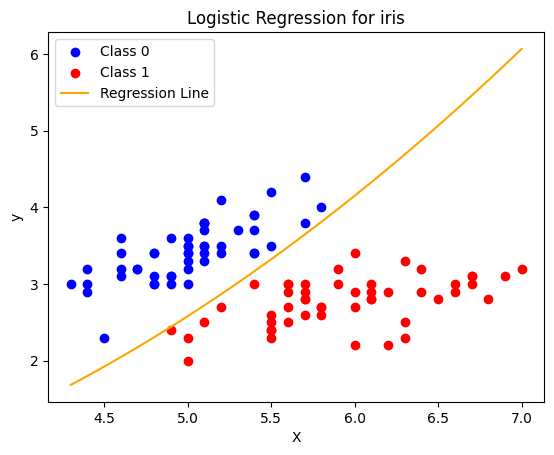

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros(n + 1) # thetas
    X_b = np.c_[np.ones((m, 1)), X] # x0 is set to 1 and concatinated with x

    for epoch in range(epochs):
        z = X_b.dot(W)
        y_pred = sigmoid(z)
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)
        W -= learning_rate * gradient

        if epoch % 100 == 0:
            loss = -1/m * np.sum(y*np.log(y_pred+1e-15)+(1-y)*np.log(1-y_pred+1e-15))
            print(f"Epoch {epoch}, Loss: {loss}")

    return W

def predict(X, W):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred = sigmoid(X_b.dot(W))
    return (y_pred >= 0.5).astype(int)

if __name__ == "__main__":
    iris = datasets.load_iris()
    X = iris.data[iris.target < 2, :2]
    y = iris.target[iris.target < 2]
    X_curve = np.c_[X, X[:,0]**2]

    # Train model
    weights = gradient_descent(X_curve, y, learning_rate=0.1, epochs=2000)

    # Plot data points
    plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')

    # Plot regression line
    x_line = np.linspace(X[:,0].min(), X[:,0].max(), 100).reshape(100, 1)
    w0, w1, w2, w3 = weights
    y_line = -(w0 + w1*x_line + w3*(x_line**2)) / w2

    plt.plot(x_line, y_line, color='orange', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Logistic Regression for iris')
    plt.legend()
    plt.show()
